In [62]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

In [63]:
train_set = pd.read_csv('archive/mnist_train.csv').values
test_set = pd.read_csv('archive/mnist_test.csv').values

In [64]:
x_train = train_set[:,1:]
y_train = train_set[:,:1]

x_train = np.reshape(x_train, (60000,28,28,1))

x_train = x_train/255.

In [65]:
x_test = test_set[:,1:]
y_test = test_set[:,:1]

x_test = np.reshape(x_test, (10000,28,28,1))

x_test = x_test/255.

#CNN Architecture Building

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D

In [67]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3), input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [68]:
model.fit(x = x_train, y = y_train, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3658 - accuracy: 0.8915
Epoch 2/7
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0900 - accuracy: 0.9718
Epoch 3/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0607 - accuracy: 0.9812
Epoch 4/7
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 5/7
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0339 - accuracy: 0.9890
Epoch 6/7
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0270 - accuracy: 0.9908
Epoch 7/7
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0261 - accuracy: 0.9914


In [69]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0542 - accuracy: 0.9847


[0.05419419705867767, 0.9847000241279602]

MNIST MNISTCNN.ipynbTest

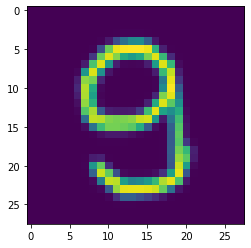

This image is of a: 9


In [83]:
ref = 0
for i in result[0]:
    print(i,ref)
    ref+=1

7.736787e-11 0
5.376782e-09 1
9.808779e-07 2
0.013420523 3
4.4616982e-07 4
0.0017701369 5
6.620432e-13 6
3.993356e-08 7
0.00019496803 8
0.98461294 9


In [84]:
img.shape

(235, 258, 3)

In [88]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


Save Model/Weights

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [ ]:
model.save("")